In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

use the next command to download the data   
wget https://raw.githubusercontent.com/amankharwal/Website-data/master/heart.csv -O heart_disease.cs

In [66]:
df = pd.read_csv('heart_disease.cs')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## ___Exploratory Data Analysis___

In [8]:
df.shape

(303, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


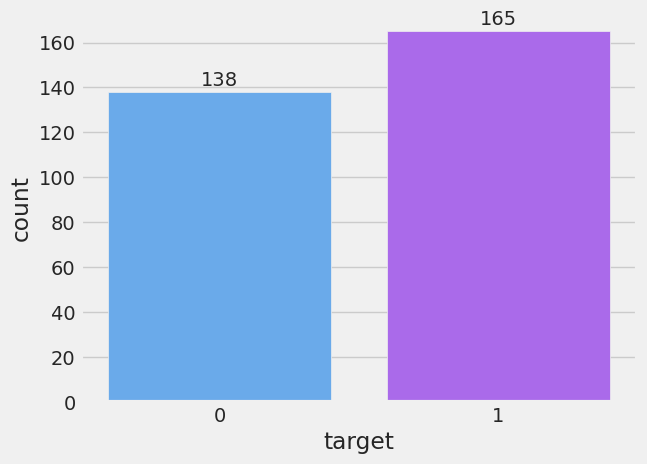

In [67]:
target = sns.countplot(x = df.target, palette= "cool")
for container in target.containers:  
    target.bar_label(container,label_type='edge',padding=2)

we have 165 people with heart disease and 138 without heart disease , so out data is balanced

In [26]:
#checking for null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [76]:
categorical = []
continous = []
for column in df.columns:
    print('-'*40)
    print(f"{column} : {df[column].nunique()}")
    if (df[column].nunique() <= 10):
        categorical.append(column)
    else:
        continous.append(column)


----------------------------------------
age : 41
----------------------------------------
sex : 2
----------------------------------------
cp : 4
----------------------------------------
trestbps : 49
----------------------------------------
chol : 152
----------------------------------------
fbs : 2
----------------------------------------
restecg : 3
----------------------------------------
thalach : 91
----------------------------------------
exang : 2
----------------------------------------
oldpeak : 40
----------------------------------------
slope : 3
----------------------------------------
ca : 5
----------------------------------------
thal : 4
----------------------------------------
target : 2


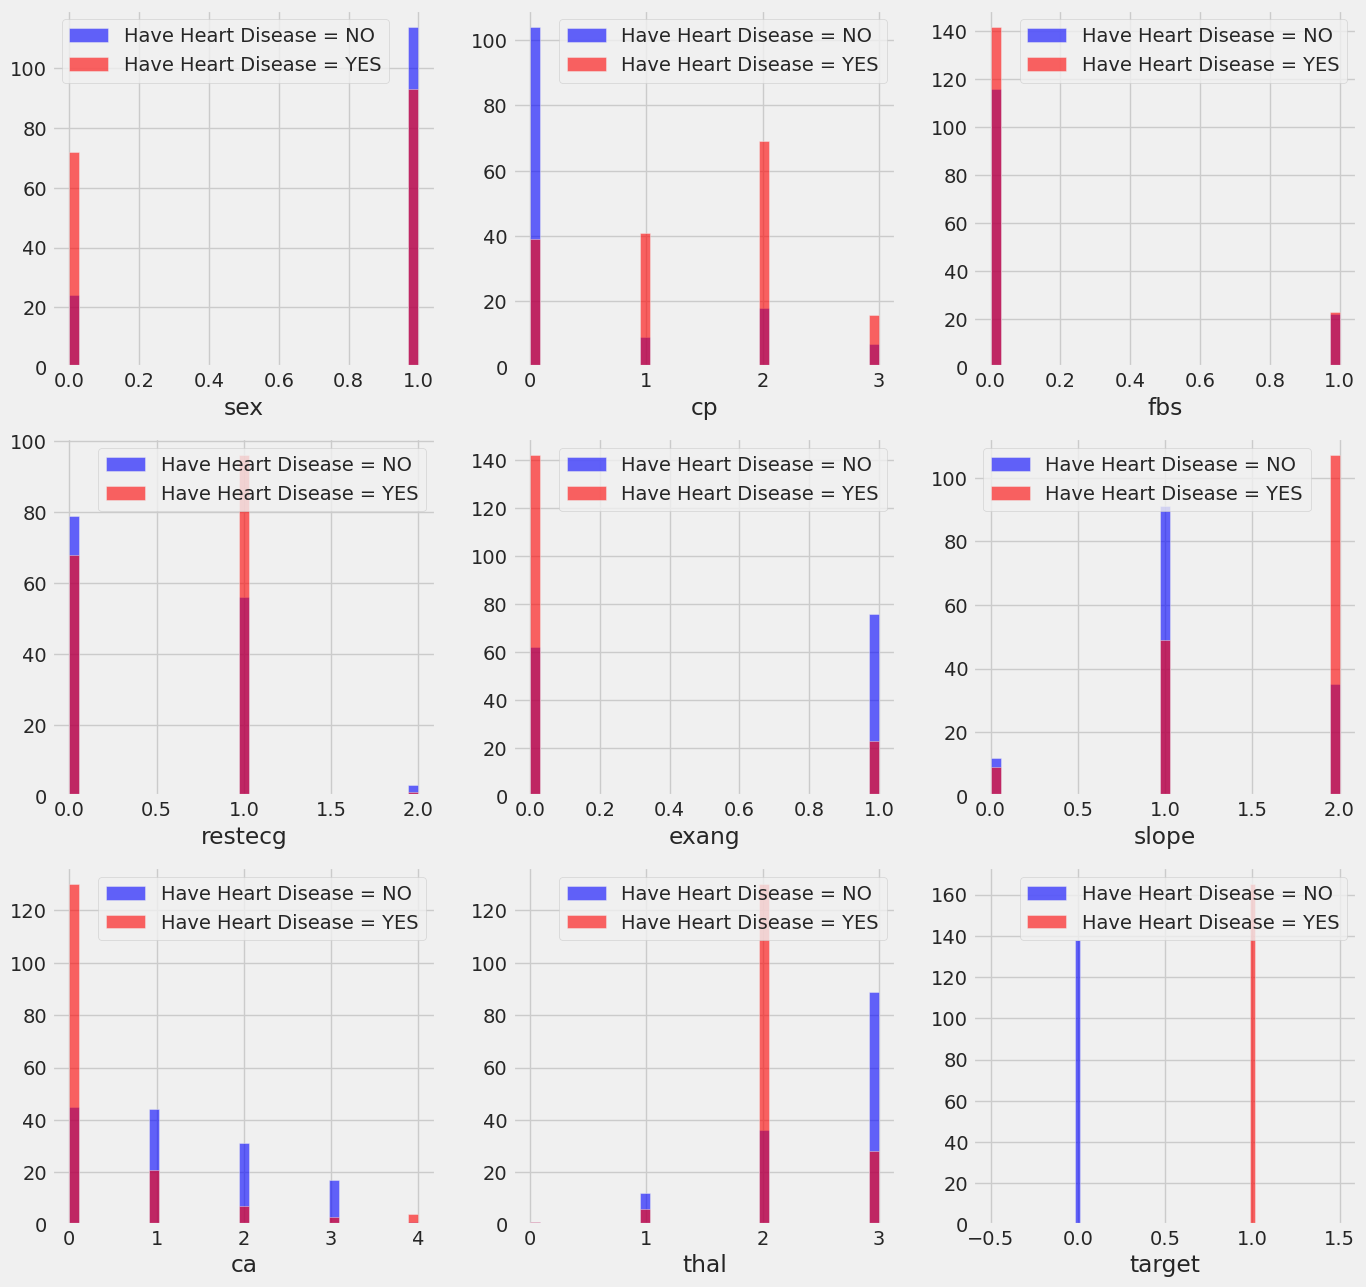

In [50]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

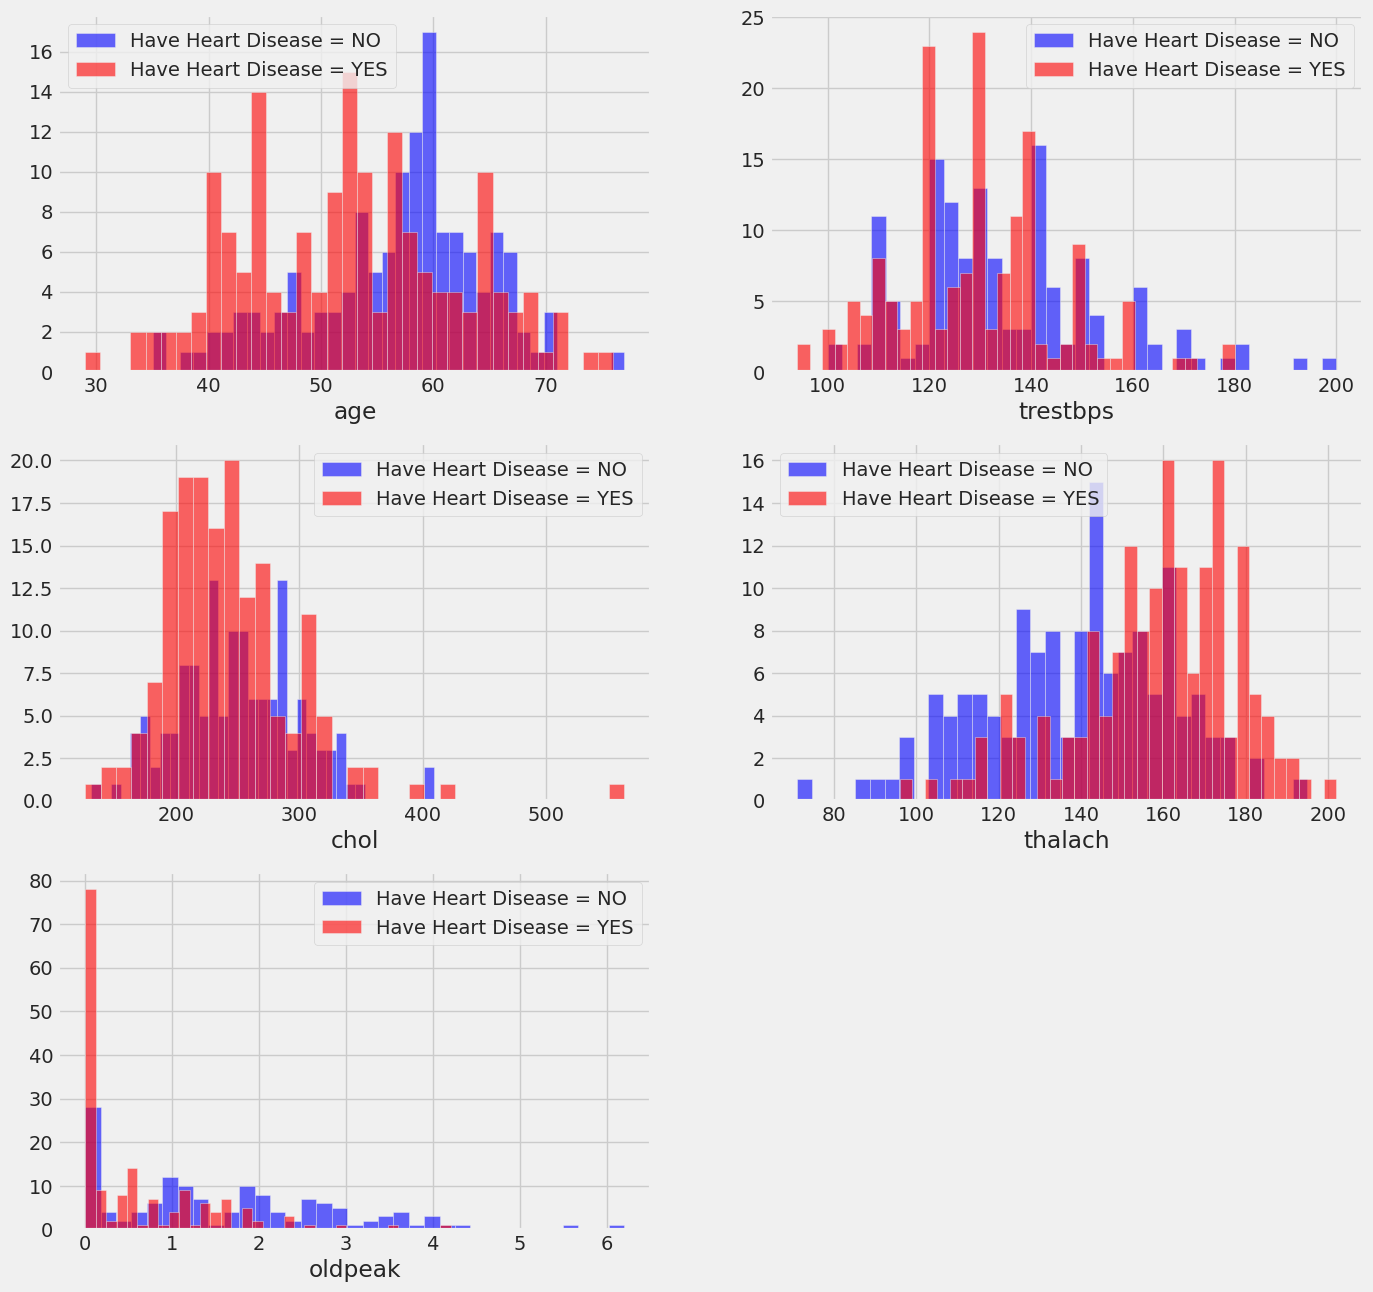

In [51]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

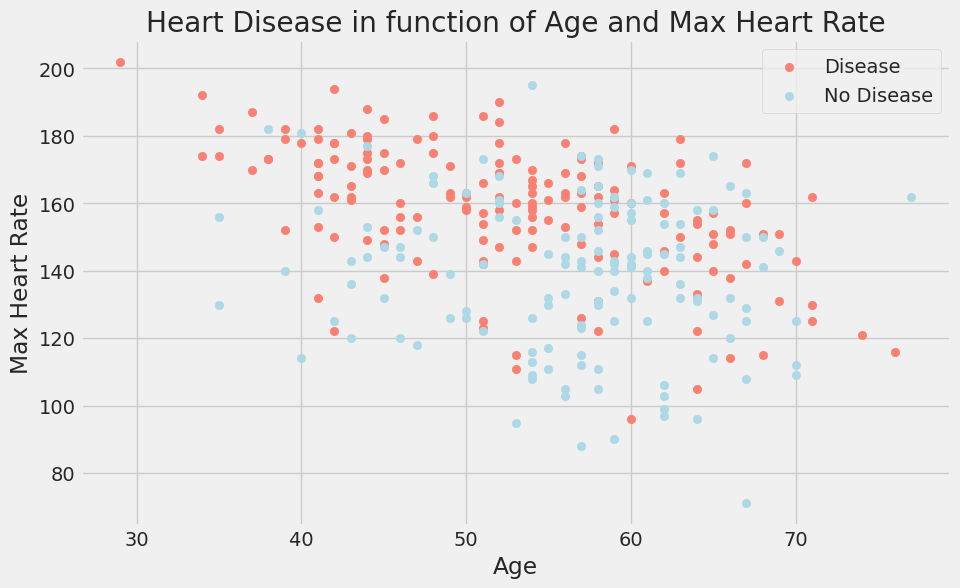

In [53]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

(14.5, -0.5)

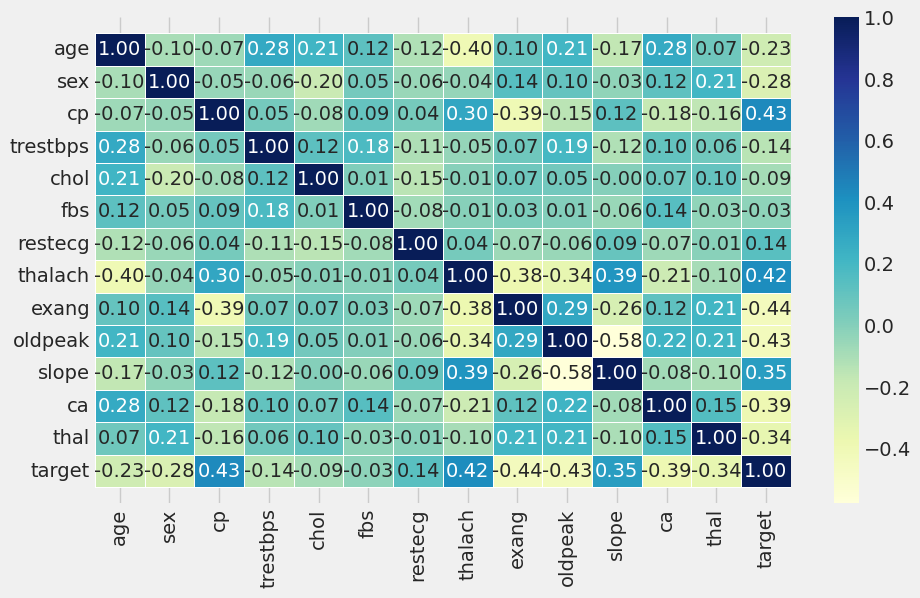

In [58]:
correlation = df.corr()
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(correlation,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<Axes: title={'center': 'Correlation with target'}>

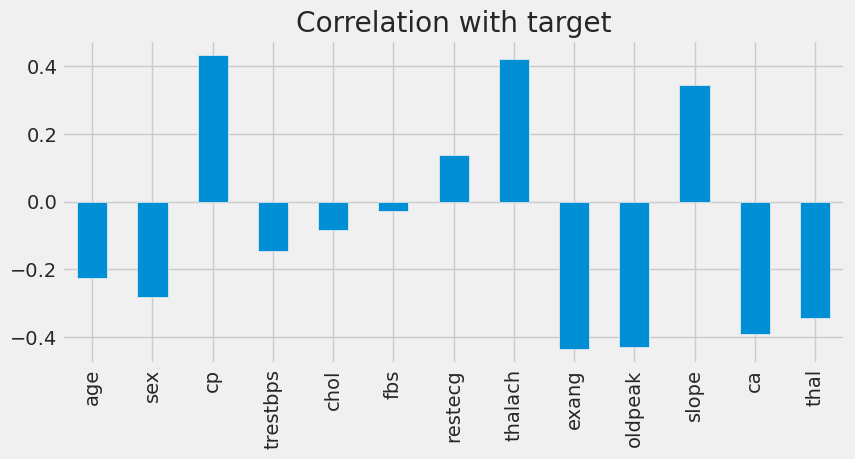

In [63]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(9, 4), title="Correlation with target")

fbs and chol have the most lower correlation with our target variable

## ___Data Preprocessing___

In [77]:
# make one-hot-encoding using get_dummies
categorical.remove("target")
data = pd.get_dummies(df, columns=categorical, dtype='int')

In [78]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [80]:
#features scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data[continous] = scalar.fit_transform(data[continous])

In [81]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [82]:
#split the data into train and test sets
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
#evaluate our model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## ___train the logistic regression model___

In [120]:
#train the LOGISTIC REGRESSION model 
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.879121    0.859504  0.867925    0.869313      0.868480
recall      0.824742    0.904348  0.867925    0.864545      0.867925
f1-score    0.851064    0.881356  0.867925    0.866210      0.867496
support    97.000000  115.000000  0.867925  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.871795   0.865385  0.868132   0.868590      0.868273
recall      0.829268   0.900000  0.868132   0.864634      0.868132
f1-score    0.850000   0.882353  0.868132   0.866176      0.867776
support    41.000000  50.000000  0.868132  91.000000     91.000000
_____________

## ___ensemble of logistic regression___

In [109]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
            LogisticRegression(), n_estimators= 20,
            max_samples=100, bootstrap= True, n_jobs= -1, random_state= 42
          )
bag_clf.fit(X_train, y_train)
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.32%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.869565    0.858333  0.863208    0.863949      0.863472
recall      0.824742    0.895652  0.863208    0.860197      0.863208
f1-score    0.846561    0.876596  0.863208    0.861578      0.862853
support    97.000000  115.000000  0.863208  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 12 103]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.850000   0.862745  0.857143   0.856373      0.857003
recall      0.829268   0.880000  0.857143   0.854634      0.857143
f1-score    0.839506   0.871287  0.857143   0.855397      0.856968
support    41.000000  50.000000  0.857143  91.000000     91.000000
_____________

## ___DecisionTree classifier___

In [114]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(X_train, y_train)
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.32%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.869565    0.858333  0.863208    0.863949      0.863472
recall      0.824742    0.895652  0.863208    0.860197      0.863208
f1-score    0.846561    0.876596  0.863208    0.861578      0.862853
support    97.000000  115.000000  0.863208  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 12 103]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.850000   0.862745  0.857143   0.856373      0.857003
recall      0.829268   0.880000  0.857143   0.854634      0.857143
f1-score    0.839506   0.871287  0.857143   0.855397      0.856968
support    41.000000  50.000000  0.857143  91.000000     91.000000
_____________

## ___RandomForestClassifier___

In [119]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=20, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.32%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.854167    0.870690  0.863208    0.862428      0.863130
recall      0.845361    0.878261  0.863208    0.861811      0.863208
f1-score    0.849741    0.874459  0.863208    0.862100      0.863149
support    97.000000  115.000000  0.863208  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 82  15]
 [ 14 101]]

Test Result:
Accuracy Score: 82.42%
_______________________________________________
CLASSIFICATION REPORT:
                   0      1  accuracy  macro avg  weighted avg
precision   0.804878   0.84  0.824176   0.822439      0.824176
recall      0.804878   0.84  0.824176   0.822439      0.824176
f1-score    0.804878   0.84  0.824176   0.822439      0.824176
support    41.000000  50.00  0.824176  91.000000     91.000000
_________________________________

# the best accuracy is 86.81% from logistic regression  